<h3 style="color: orange;">Relatório Técnico - Cannoli dataset</h3>
Relatório técnico do dataset da Cannoli, processado com código-fonte + relatório de análise de desempenho.


## 1. Carregando e unificando os dados de **pedidos**

Como primeiros passos, carregamos os dados de pedidos dos arquivos relevantes (`Order_semicolon.csv`, `Dados de pedidos - Cannoli X FECAP.json`, `order-example.json`) em DataFrames pandas. Devemos inspecionar os formatos desses arquivos para unificá-los em uma única estrutura, focando nas informações relevantes para cancelamento (status do pedido, informações do cliente, etc.).


In [28]:
# Pedidos | Conhecendo as 23 colunas e primeiras linhas do arquivo Order_semicolon.csv:
import pandas as pd

df_order_csv = pd.read_csv('Order_semicolon.csv', sep=';')

print("Cabeçalho de Order_semicolon.csv:")
display(df_order_csv.head())
print("\nColunas de Order_semicolon.csv:")
display(df_order_csv.columns)

Cabeçalho de Order_semicolon.csv:


,id,companyId,containerId,createdAt,customer,displayId,engineId,engineName,engineType,extraInfo,...,orderTiming,orderType,salesChannel,scheduledAt,status,preparationTime,takeOutTimeInSeconds,totalAmount,updatedAt,version
0,1,I0VP1DZXGU,AKVXT2FH,08/01/2025 15:47,525,O8CC98,E3R037,DirectOrder,POS,Adipisci maiores nam eius vero nesciunt sed.,...,IMMEDIATE,DELIVERY,ANOTAAI,NaN,DISPATCHED,45,2131,90.91,09/01/2025 03:32,v3.7.8
1,2,04MEUULZ6W,KKMY5TG5,03/11/2024 22:30,694,HJ99VA,EJVOBV,DirectOrder,APP,NaN,...,IMMEDIATE,DELIVERY,WHATSAPP,NaN,CONCLUDED,33,374,99.69,04/11/2024 03:05,v2.3.0
2,3,W2ZZS7CCZW,I87JLGTV,09/09/2024 05:49,491,XJJDH2,UDX1ZF,KDSPro,POS,NaN,...,IMMEDIATE,INDOOR,EPADOCA,NaN,CONCLUDED,22,247,45.97,09/09/2024 09:32,v1.9.5
3,4,SQ5MBL8L24,W3ZXOQHO,22/05/2025 06:22,846,J8QDM3,30FLOC,KDSPro,WEB,Autem mollitia voluptas quasi.,...,SCHEDULED,TAKEOUT,99FOOD,22/05/2025 14:22,CANCELED,35,1766,104.31,22/05/2025 21:39,v2.8.5
4,5,0RCNJ6BRJD,NA0C0FOS,22/02/2025 01:23,77,H4LV73,QI3URN,KDSPro,POS,NaN,...,SCHEDULED,DELIVERY,99FOOD,24/02/2025 11:23,DISPATCHED,20,1219,105.50,22/02/2025 13:53,v2.1.3



Colunas de Order_semicolon.csv:


Index(['id', 'companyId', 'containerId', 'createdAt', 'customer', 'displayId',
       'engineId', 'engineName', 'engineType', 'extraInfo', 'integrated',
       'integrationId', 'isTest', 'orderTiming', 'orderType', 'salesChannel',
       'scheduledAt', 'status', 'preparationTime', 'takeOutTimeInSeconds',
       'totalAmount', 'updatedAt', 'version'],
      dtype='object')

In [29]:
# Pedidos | Imprimindo o conteúdo do arquivo JSON order-example.json com identação e tratamento de erro:

import json
import pandas as pd

try:
    with open('order-example.json', 'r') as f:
        order_example_data = json.load(f)
    print("Estrutura de order-example.json:")
    print(json.dumps(order_example_data, indent=4))

except FileNotFoundError:
    print("Erro: order-example.json não encontrado.")
except json.JSONDecodeError:
    print("Erro: Não foi possível decodificar order-example.json. Verifique o formato do arquivo.")

Estrutura de order-example.json:
{
    "benefits": [],
    "companyId": "00000000000000000000000000000000",
    "cancellation": null,
    "extraInfo": null,
    "displayId": "12345",
    "id": "CANNOLI_00000000000000000000000000000000",
    "isTest": false,
    "indoor": null,
    "integrated": false,
    "integrationId": null,
    "merchant": {
        "id": "00000000000000000000000000000000",
        "name": "Food Service",
        "description": "",
        "doc": "00000000000000",
        "docType": "CNPJ"
    },
    "orderTiming": "IMMEDIATE",
    "orderType": "DELIVERY",
    "preparationStartDateTime": "2000-01-01T00:00:01.100Z",
    "reference": "00000000000000000000000000000000",
    "salesChannel": "WHATSAPP",
    "scheduledAt": "2000-01-01T00:00:01.100Z",
    "scheduled": false,
    "takeout": null,
    "takeOutTimeInSeconds": 1800,
    "version": "0.0.3",
    "engineType": "CANNOLI",
    "engineName": "CANNOLI",
    "engineId": "00000000000000000000000000000000",
    "contai

In [30]:
# Pedidos | Imprimindo o conteúdo do arquivo JSON Dados de pedidos - Cannoli X FECAP.json, 
# mostrando cabeçalho e nomes das 38 colunas:

import pandas as pd
import json

try:
    df_order_json1 = pd.read_json('Dados de pedidos - Cannoli X FECAP.json')
    print("Cabeçalho de Dados de pedidos - Cannoli X FECAP.json:")
    display(df_order_json1.head())
    print("\nColunas de Dados de pedidos - Cannoli X FECAP.json:")
    display(df_order_json1.columns)
except FileNotFoundError:
    print("Erro: Dados de pedidos - Cannoli X FECAP.json não encontrado.")
except Exception as e:
    print(f"Erro ao ler Dados de pedidos - Cannoli X FECAP.json: {e}")

Cabeçalho de Dados de pedidos - Cannoli X FECAP.json:


,id,displayId,category,orderTiming,orderType,delivery,preparationStartDateTime,isTest,salesChannel,merchant,...,cancellation,integrated,integrationId,scheduledAt,scheduled,takeout,takeOutTimeInSeconds,version,extraInfo,indoor
0,IFOOD_c2b5ba58-f819-469c-99c9-09ea2fae2835,4146,FOOD,IMMEDIATE,DELIVERY,"{'mode': 'DEFAULT', 'description': 'Padrão', '...",2025-08-27T16:56:17.823Z,False,IFOOD,"{'id': '40afd127-533e-41ee-adde-2e20c9da5712',...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IFOOD_b21d3375-8877-4cef-8673-dabf4ceb1852,0899,FOOD,IMMEDIATE,DELIVERY,"{'mode': 'DEFAULT', 'description': 'Padrão', '...",2025-08-27T14:30:23.892Z,False,IFOOD,"{'id': '40afd127-533e-41ee-adde-2e20c9da5712',...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IFOOD_77073c46-1ee6-4711-b78c-24aa03dbdbdb,4796,FOOD,IMMEDIATE,DELIVERY,"{'mode': 'DEFAULT', 'description': 'Padrão', '...",2025-08-27T06:08:46.162Z,False,IFOOD,"{'id': '40afd127-533e-41ee-adde-2e20c9da5712',...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IFOOD_3473890d-e460-4f2e-b9a9-2a2c146639a8,2383,FOOD,IMMEDIATE,DELIVERY,"{'mode': 'DEFAULT', 'description': 'Padrão', '...",2025-08-27T05:51:25.432Z,False,IFOOD,"{'id': '40afd127-533e-41ee-adde-2e20c9da5712',...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DELIVERYVIP_30537017-7064-42b4-83e7-b399399dfbce,LCRRVW,NaN,IMMEDIATE,DELIVERY,"{'deliveryAddress': {'country': 'BR', 'state':...",2025-08-27T05:54:58.779Z,False,CANNOLI,"{'id': '1745956859395BA7BB07E98BF5D6132C', 'na...",...,NaN,0.0,NaN,None,0.0,NaN,1800.0,0.0.3,NaN,NaN



Colunas de Dados de pedidos - Cannoli X FECAP.json:


Index(['id', 'displayId', 'category', 'orderTiming', 'orderType', 'delivery',
       'preparationStartDateTime', 'isTest', 'salesChannel', 'merchant',
       'customer', 'items', 'benefits', 'total', 'payments', 'additionalFees',
       'picking', 'reference', 'engineType', 'engineName', 'engineId',
       'companyId', 'containerId', 'active', 'createdAt', 'actions',
       'updatedAt', 'status', 'cancellation', 'integrated', 'integrationId',
       'scheduledAt', 'scheduled', 'takeout', 'takeOutTimeInSeconds',
       'version', 'extraInfo', 'indoor'],
      dtype='object')

## 2. Carregando dados de **clientes**

Em seguida, carregamos os dados de clientes dos arquivos relevantes (`Customer_semicolon.csv` e `customer-example.json`) em DataFrames pandas.


In [31]:
# Clientes | Imprimindo o conteúdo do arquivo Customer_semicolon.csv:

import pandas as pd
import json

try:
    df_customer_csv = pd.read_csv('Customer_semicolon.csv', sep=';')
    print("Cabeçalho de df_customer_csv:")
    display(df_customer_csv.head())
    print("\ndf_customer_csv colunas:")
    display(df_customer_csv.columns)
except FileNotFoundError:
    print("Erro: Customer_semicolon.csv não encontrado.")
except Exception as e:
    print(f"Erro ao ler Customer_semicolon.csv: {e}")

Cabeçalho de df_customer_csv:


,id,name,taxId,gender,dateOfBirth,status,externalCode,isEnriched,enrichedAt,enrichedBy,createdAt,createdBy,updatedAt,updatedBy,phone,email
0,1,Fernanda Duarte,207.463.819-13,O,05/10/1972,1,NaN,True,04/08/2024 02:29,franciscocarvalho,08/06/2024 02:29,pferreira,04/08/2024 02:29,wazevedo,"5,52193E+12",luigi67@hotmail.com
1,2,Matheus Jesus,46.792.503/0001-48,M,19/03/1962,2,NaN,False,NaN,NaN,29/12/2023 11:04,livia49,09/03/2024 11:04,ana-beatriz44,"5,55192E+12",otavio28@bol.com.br
2,3,João da Mota,594.173.682-73,F,20/10/1991,1,UZZPQK51,True,31/10/2023 02:50,calebe40,16/10/2023 02:50,lopesmaria-vitoria,31/10/2023 02:50,luiz-fernandopires,"5,56191E+12",eduardasantos@yahoo.com.br
3,4,Arthur Silveira,574.908.123-05,F,04/08/1952,1,NaN,True,07/07/2024 18:43,moraesluigi,04/12/2023 18:43,da-conceicaonoah,07/07/2024 18:43,vieiraguilherme,"5,58497E+12",jcosta@uol.com.br
4,5,Vicente Teixeira,937.825.104-88,NaN,04/02/1973,1,NaN,False,NaN,NaN,26/07/2024 06:52,ferreiramatheus,14/01/2025 06:52,goncalvesluna,"5,522E+12",oda-paz@ig.com.br



df_customer_csv colunas:


Index(['id', 'name', 'taxId', 'gender', 'dateOfBirth', 'status',
       'externalCode', 'isEnriched', 'enrichedAt', 'enrichedBy', 'createdAt',
       'createdBy', 'updatedAt', 'updatedBy', 'phone', 'email'],
      dtype='object')

In [32]:
# Clientes | Imprimindo o conteúdo do arquivo customer-example.json, com identação e tratamento de erro:

try:
    with open('customer-example.json', 'r') as f:
        customer_example_data = json.load(f)
    print("\nEstrutura de customer-example.json:")
    print(json.dumps(customer_example_data, indent=4))

except FileNotFoundError:
    print("\nErro: customer-example.json não encontrado.")
except json.JSONDecodeError:
    print("\nErro: Não foi possível decodificar customer-example.json. Verifique o formato do arquivo.")
except Exception as e:
    print(f"\nErro ao ler customer-example.json: {e}")


Estrutura de customer-example.json:
{
    "id": "000000000000-0000-0000-0000-00000000",
    "name": "Joao Pessoa",
    "taxId": "12345678900",
    "gender": "O",
    "dateOfBirth": null,
    "status": 1,
    "externalCode": "000000000000-0000-0000-0000-00000000",
    "isEnriched": null,
    "enrichedAt": null,
    "enrichedBy": null,
    "createdAt": "2000-01-01T00:00:01.100Z",
    "createdBy": "Admin",
    "updatedAt": "2000-01-01T00:00:01.100Z",
    "updatedBy": "System",
    "customerAddress": [],
    "customerPhone": [
        {
            "id": "000000000000-0000-0000-0000-00000000",
            "customerId": "000000000000-0000-0000-0000-00000000",
            "countryCode": "55",
            "areaCode": "11",
            "phoneNumber": "912345678",
            "type": 1,
            "externalCode": null,
            "isDefault": true,
            "status": 1,
            "createdAt": "2000-01-01T00:00:01.100Z",
            "createdBy": "System",
            "updatedAt": "2000-0

## 3. Combinando os dados

Como próximos passos, combinamos os dados de **pedidos** e **clientes** com base em identificadores comuns para criar um dataset único para o modelo, cujo nome demos de `df_merged`.


In [33]:
# Pedidos e Clientes | Criação do dataset combinado:

import pandas as pd

if 'df_order_csv' in locals() and 'df_customer_csv' in locals():
    print("Tipo de dado de 'customer' em df_order_csv:", df_order_csv['customer'].dtype)
    print("Tipo de dado de 'id' em df_customer_csv:", df_customer_csv['id'].dtype)

    # Garantimos que os campos usados para o relacionamento (customer, em pedidos e id, em clientes) sejam string:
    df_order_csv['customer'] = df_order_csv['customer'].astype(str)
    df_customer_csv['id'] = df_customer_csv['id'].astype(str)

    # e assim, fizemos uma junção (merge) do tipo 'left'
    df_merged = pd.merge(df_order_csv, df_customer_csv, left_on='customer', right_on='id', how='left')

    print("\nCabeçalho do DataFrame Combinado:")
    display(df_merged.head())
    print("\nColunas do DataFrame Combinado:")
    display(df_merged.columns)
else:
    print("Erro: DataFrames necessários (df_order_csv ou df_customer_csv) não encontrados para a combinação.")

Tipo de dado de 'customer' em df_order_csv: int64
Tipo de dado de 'id' em df_customer_csv: int64

Cabeçalho do DataFrame Combinado:


,id_x,companyId,containerId,createdAt_x,customer,displayId,engineId,engineName,engineType,extraInfo,...,externalCode,isEnriched,enrichedAt,enrichedBy,createdAt_y,createdBy,updatedAt_y,updatedBy,phone,email
0,1,I0VP1DZXGU,AKVXT2FH,08/01/2025 15:47,525,O8CC98,E3R037,DirectOrder,POS,Adipisci maiores nam eius vero nesciunt sed.,...,HVQRHOFU,False,NaN,NaN,09/05/2024 15:46,ucavalcanti,18/05/2024 15:46,ana-vitoriamoraes,"5,56196E+12",francisco76@yahoo.com.br
1,2,04MEUULZ6W,KKMY5TG5,03/11/2024 22:30,694,HJ99VA,EJVOBV,DirectOrder,APP,NaN,...,XQKWQH5K,False,NaN,NaN,26/11/2023 17:23,juliana65,18/09/2024 17:23,da-motaagatha,"5,522E+12",tmonteiro@gmail.com
2,3,W2ZZS7CCZW,I87JLGTV,09/09/2024 05:49,491,XJJDH2,UDX1ZF,KDSPro,POS,NaN,...,NaN,True,06/07/2024 06:02,nunesrafaela,03/06/2024 06:02,marianacosta,06/07/2024 06:02,nathancaldeira,"5,58495E+12",davi-lucca21@hotmail.com
3,4,SQ5MBL8L24,W3ZXOQHO,22/05/2025 06:22,846,J8QDM3,30FLOC,KDSPro,WEB,Autem mollitia voluptas quasi.,...,NaN,True,20/02/2024 22:32,pereiramaite,17/01/2024 22:32,lorenzo31,20/02/2024 22:32,guilherme57,"5,57195E+12",joao-guilhermeda-rosa@bol.com.br
4,5,0RCNJ6BRJD,NA0C0FOS,22/02/2025 01:23,77,H4LV73,QI3URN,KDSPro,POS,NaN,...,NaN,True,18/05/2024 01:04,peixotodanilo,26/01/2024 01:04,biancalima,18/05/2024 01:04,carolinanascimento,"5,55195E+12",luanacostela@ig.com.br



Colunas do DataFrame Combinado:


Index(['id_x', 'companyId', 'containerId', 'createdAt_x', 'customer',
       'displayId', 'engineId', 'engineName', 'engineType', 'extraInfo',
       'integrated', 'integrationId', 'isTest', 'orderTiming', 'orderType',
       'salesChannel', 'scheduledAt', 'status_x', 'preparationTime',
       'takeOutTimeInSeconds', 'totalAmount', 'updatedAt_x', 'version', 'id_y',
       'name', 'taxId', 'gender', 'dateOfBirth', 'status_y', 'externalCode',
       'isEnriched', 'enrichedAt', 'enrichedBy', 'createdAt_y', 'createdBy',
       'updatedAt_y', 'updatedBy', 'phone', 'email'],
      dtype='object')

## 4. Preparando a base de dados

I. Identificamos as colunas (features) relevantes para prever o cancelamento de pedidos, chamando-as de `relevant_features_initial`.


In [34]:
if 'df_merged' in locals():
    print("Colunas em df_merged:")
    print(df_merged.columns.tolist())

    relevant_features_initial = [
        'containerId',
        'createdAt_x',
        'customer',
        'status_x',
        'totalAmount',
        'preparationTime',
        'takeOutTimeInSeconds',
        'version',
        'gender',
        'dateOfBirth',
        'status_y',
        'phone',
        'email'
    ]

    relevant_features = [col for col in relevant_features_initial if col in df_merged.columns]

    print("\nFeatures potencialmente relevantes para prever o cancelamento de pedidos:")
    print(relevant_features)
else:
    print("Erro: DataFrame Combinado (df_merged) não encontrado. Não é possível identificar features relevantes.")

Colunas em df_merged:
['id_x', 'companyId', 'containerId', 'createdAt_x', 'customer', 'displayId', 'engineId', 'engineName', 'engineType', 'extraInfo', 'integrated', 'integrationId', 'isTest', 'orderTiming', 'orderType', 'salesChannel', 'scheduledAt', 'status_x', 'preparationTime', 'takeOutTimeInSeconds', 'totalAmount', 'updatedAt_x', 'version', 'id_y', 'name', 'taxId', 'gender', 'dateOfBirth', 'status_y', 'externalCode', 'isEnriched', 'enrichedAt', 'enrichedBy', 'createdAt_y', 'createdBy', 'updatedAt_y', 'updatedBy', 'phone', 'email']

Features potencialmente relevantes para prever o cancelamento de pedidos:
['containerId', 'createdAt_x', 'customer', 'status_x', 'totalAmount', 'preparationTime', 'takeOutTimeInSeconds', 'version', 'gender', 'dateOfBirth', 'status_y', 'phone', 'email']


II. O bloco abaixo é extenso. O que fizemos nele foi tratar **valores ausentes** usando mediana e moda, converte datas (`createdAt_x` e `dateOfBirth`), lida com **formatos de dados inconsistentes** e realiza a **engenharia de features** (criação de novas colunas): 
- dia da semana
- hora
- mês
- idade


In [35]:
if 'df_merged' in locals():

    # Definimos as colunas relevantes para o processamento:
    relevant_features_for_processing = [
        'containerId',
        'createdAt_x',
        'customer',
        'status_x',
        'totalAmount',
        'preparationTime',
        'takeOutTimeInSeconds',
        'version',
        'gender',
        'dateOfBirth',
        'status_y',
        'phone',
        'email'
    ]

    relevant_features_for_processing = [col for col in relevant_features_for_processing if col in df_merged.columns]

    # Check de valores nulos (NaN):
    print("Valores ausentes antes do tratamento:")
    display(df_merged[relevant_features_for_processing].isnull().sum())

    # Dividimos as colunas em duas categorias: numéricas e categóricas
    numerical_cols = [col for col in ['totalAmount', 'preparationTime', 'takeOutTimeInSeconds'] if col in relevant_features_for_processing]
    categorical_cols = [col for col in ['containerId', 'version', 'gender', 'status_y', 'phone', 'email'] if col in relevant_features_for_processing]

    # Numéricas: substitui NaN pela mediana da coluna:
    for col in numerical_cols:
        if col in df_merged.columns:
            df_merged[col].fillna(df_merged[col].median())

    # Categóricas: substitui NaN pela moda (valor que aparece com mais frequência):
    for col in categorical_cols:
        if col in df_merged.columns:
            mode_value = df_merged[col].mode()
            if not mode_value.empty:
                df_merged[col].fillna(mode_value[0])
            else:
                print(f"Aviso: O modo está vazio para a coluna '{col}'. Não é possível imputar com o modo.")

    if 'createdAt_x' in df_merged.columns:
        df_merged['createdAt_x'] = pd.to_datetime(df_merged['createdAt_x'], format='%d/%m/%Y %H:%M', errors='coerce')
        print("\n'createdAt_x' convertido para datetime.")
    else:
        print("\n'createdAt_x' não encontrado. Pulando conversão para datetime e extração de features para esta coluna.")

    if 'createdAt_x' in df_merged.columns and pd.api.types.is_datetime64_any_dtype(df_merged['createdAt_x']):
        df_merged['order_day_of_week'] = df_merged['createdAt_x'].dt.dayofweek
        df_merged['order_hour'] = df_merged['createdAt_x'].dt.hour
        df_merged['order_month'] = df_merged['createdAt_x'].dt.month
        print("Features de tempo extraídas de 'createdAt_x'.")
    else:
        print("Pulando extração de features de tempo, pois 'createdAt_x' não é uma coluna datetime.")

    # Tratamento de dateOfBirth, ou seja, a idade do cliente:
    if 'dateOfBirth' in df_merged.columns:
        print("\nValores ausentes e tipo de dado para dateOfBirth antes do tratamento:")
        print(df_merged['dateOfBirth'].isnull().sum())
        print(df_merged['dateOfBirth'].dtype)

        df_merged['dateOfBirth'] = pd.to_datetime(df_merged['dateOfBirth'], format='%d/%m/%Y', errors='coerce')
        print("Tentativa de converter 'dateOfBirth' para datetime.")

        if pd.api.types.is_datetime64_any_dtype(df_merged['dateOfBirth']):
            if 'createdAt_x' in df_merged.columns and pd.api.types.is_datetime64_any_dtype(df_merged['createdAt_x']):
                 reference_date = df_merged['createdAt_x'].max()
            else:
                 reference_date = pd.to_datetime('today')

            if pd.isna(reference_date):
                 reference_date = pd.to_datetime('today')

            df_merged['age'] = (reference_date - df_merged['dateOfBirth']).dt.days / 365.25
            df_merged['age'] = df_merged['age'].apply(lambda x: x if not pd.isna(x) and x >= 0 and x <= 120 else pd.NA)
            print("'age' calculado a partir de 'dateOfBirth'.")
        else:
            print("Pulando cálculo de idade, pois 'dateOfBirth' não é uma coluna datetime.")
    else:
        print("\n'dateOfBirth' não encontrado. Pulando análise de dateOfBirth e cálculo de idade.")

    cols_to_display_missing = relevant_features_for_processing[:]
    if 'order_day_of_week' in df_merged.columns: cols_to_display_missing.extend(['order_day_of_week', 'order_hour', 'order_month'])
    if 'age' in df_merged.columns: cols_to_display_missing.append('age')

    cols_to_display_missing = [col for col in cols_to_display_missing if col in df_merged.columns]

    # Reexibimos os valores ausentes após a limpeza:
    print("\nValores ausentes após o tratamento:")
    display(df_merged[cols_to_display_missing].isnull().sum())

    cols_to_display_head = relevant_features_for_processing[:]
    if 'order_day_of_week' in df_merged.columns: cols_to_display_head.extend(['order_day_of_week', 'order_hour', 'order_month'])
    if 'age' in df_merged.columns: cols_to_display_head.append('age')

    cols_to_display_head = [col for col in cols_to_display_head if col in df_merged.columns]

    # Por último, mostramos as primeiras linhas após o feature engineering:
    print("\nPrimeiras linhas após limpeza e engenharia de features:")
    display(df_merged[cols_to_display_head].head())

else:
    print("Erro: DataFrame Combinado (df_merged) não encontrado. Pulando preparação dos dados.")

Valores ausentes antes do tratamento:


containerId               0
createdAt_x               0
customer                  0
status_x                  0
totalAmount               0
preparationTime           0
takeOutTimeInSeconds      0
version                   0
gender                  502
dateOfBirth               0
status_y                  0
phone                     0
email                     0
dtype: int64


'createdAt_x' convertido para datetime.
Features de tempo extraídas de 'createdAt_x'.

Valores ausentes e tipo de dado para dateOfBirth antes do tratamento:
0
object
Tentativa de converter 'dateOfBirth' para datetime.
'age' calculado a partir de 'dateOfBirth'.

Valores ausentes após o tratamento:


containerId               0
createdAt_x               0
customer                  0
status_x                  0
totalAmount               0
preparationTime           0
takeOutTimeInSeconds      0
version                   0
gender                  502
dateOfBirth               0
status_y                  0
phone                     0
email                     0
order_day_of_week         0
order_hour                0
order_month               0
age                       0
dtype: int64


Primeiras linhas após limpeza e engenharia de features:


,containerId,createdAt_x,customer,status_x,totalAmount,preparationTime,takeOutTimeInSeconds,version,gender,dateOfBirth,status_y,phone,email,order_day_of_week,order_hour,order_month,age
0,AKVXT2FH,2025-01-08 15:47:00,525,DISPATCHED,90.91,45,2131,v3.7.8,O,2000-01-15,1,"5,56196E+12",francisco76@yahoo.com.br,2,15,1,25.631759
1,KKMY5TG5,2024-11-03 22:30:00,694,CONCLUDED,99.69,33,374,v2.3.0,M,2003-03-14,1,"5,522E+12",tmonteiro@gmail.com,6,22,11,22.472279
2,I87JLGTV,2024-09-09 05:49:00,491,CONCLUDED,45.97,22,247,v1.9.5,F,1968-07-05,2,"5,58495E+12",davi-lucca21@hotmail.com,0,5,9,57.160849
3,W3ZXOQHO,2025-05-22 06:22:00,846,CANCELED,104.31,35,1766,v2.8.5,NaN,1987-10-01,2,"5,57195E+12",joao-guilhermeda-rosa@bol.com.br,3,6,5,37.921971
4,NA0C0FOS,2025-02-22 01:23:00,77,DISPATCHED,105.50,20,1219,v2.1.3,F,1976-03-21,2,"5,55195E+12",luanacostela@ig.com.br,5,1,2,49.451061


III. O bloco abaixo adiciona `paymentMethod` e `status` como features, pensando já em modelagem (target = status). A limpeza é praticamente a mesma, mas organizada como se fosse uma segunda versão mais refinada.

Esta etapa é Já começa a preparar o dataset para machine learning (com features tratadas e variáveis alvo).

In [36]:
# Inspecionamos novamente as colunas em df_merged para verificar quais estão disponíveis:
print("Colunas disponíveis em df_merged:")
print(df_merged.columns.tolist())

# Atualizamos relevant_features com base nas colunas atuais em df_merged
# e filtramos a lista relevant_features definida anteriormente:
original_relevant_features = [
    'containerId',
    'createdAt_x',
    'customer',
    'status', # Variável de destino, mas também mostra outros status
    'totalAmount',
    'paymentMethod',
    'preparationTime',
    'takeOutTimeInSeconds',
    'version',
    'gender',
    'dateOfBirth',
    'status_y', # Status do cliente
    'phone',
    'email'
]

# Garantir que apenas as colunas presentes em df_merged sejam mantidas:
relevant_features = [col for col in original_relevant_features if col in df_merged.columns]

print("\nRecursos relevantes atualizados com base nas colunas df_merged:")
print(relevant_features)

Colunas disponíveis em df_merged:
['id_x', 'companyId', 'containerId', 'createdAt_x', 'customer', 'displayId', 'engineId', 'engineName', 'engineType', 'extraInfo', 'integrated', 'integrationId', 'isTest', 'orderTiming', 'orderType', 'salesChannel', 'scheduledAt', 'status_x', 'preparationTime', 'takeOutTimeInSeconds', 'totalAmount', 'updatedAt_x', 'version', 'id_y', 'name', 'taxId', 'gender', 'dateOfBirth', 'status_y', 'externalCode', 'isEnriched', 'enrichedAt', 'enrichedBy', 'createdAt_y', 'createdBy', 'updatedAt_y', 'updatedBy', 'phone', 'email', 'order_day_of_week', 'order_hour', 'order_month', 'age']

Recursos relevantes atualizados com base nas colunas df_merged:
['containerId', 'createdAt_x', 'customer', 'totalAmount', 'preparationTime', 'takeOutTimeInSeconds', 'version', 'gender', 'dateOfBirth', 'status_y', 'phone', 'email']


In [37]:
# 1. Analisando valores ausentes nos recursos relevantes atualizados
print("\nValores ausentes antes do tratamento:")
display(df_merged[relevant_features].isnull().sum())


# 2. Definindo uma estratégia para lidar com valores ausentes e implementando:

# Estratégia simples: Imputa colunas numéricas com mediana, categóricas com moda e manipula colunas específicas.
# Para 'gênero', 'dataNascimento', 'status_a', 'telefone', 'e-mail', podemos manter os NaNs ou imputar com base na análise.
# Identifique colunas numéricas e categóricas da lista atualizada de relevant_features
numerical_cols = [col for col in ['totalAmount', 'preparationTime', 'takeOutTimeInSeconds'] if col in relevant_features]
categorical_cols = [col for col in ['containerId', 'paymentMethod', 'version', 'gender', 'status_y', 'phone', 'email'] if col in relevant_features]

# Imputando colunas numéricas com mediana
for col in numerical_cols:
    df_merged[col].fillna(df_merged[col].median())

# Imputando colunas categóricas/objeto com moda
for col in categorical_cols:
     # Calculando a moda, lidando com múltiplas modas potenciais e escolhendo a primeira:
     mode_value = df_merged[col].mode()
     if not mode_value.empty:
         df_merged[col].fillna(mode_value[0])
     else:
         # Se a moda for vazia (por exemplo, todas NaN), escolhemos outra estratégia:
         print(f"Aviso: A moda está vazio para a coluna '{col}'. Não é possível imputar com a moda.")


# 3. Convertendo createdAt_x em objetos datetime e verificando
# se 'createdAt_x' está nas colunas relevant_features e df_merged antes de converter:
if 'createdAt_x' in relevant_features:
    # Supondo que 'createdAt_x' esteja no formato 'dd/mm/yyyy HH:MM', com base na inspeção anterior:
    df_merged['createdAt_x'] = pd.to_datetime(df_merged['createdAt_x'], format='%d/%m/%Y %H:%M', errors='coerce')
    print("\nConverted 'createdAt_x' to datetime.")
else:
    print("\n'createdAt_x' não foi encontrado nos recursos relevantes ou no DataFrame. Ignorando a conversão de data e hora e a extração de recursos para esta coluna.")


# 4. Extract features from createdAt_x only if conversion was successful
if 'createdAt_x' in df_merged.columns and pd.api.types.is_datetime64_any_dtype(df_merged['createdAt_x']):
    df_merged['order_day_of_week'] = df_merged['createdAt_x'].dt.dayofweek # Monday=0, Sunday=6
    df_merged['order_hour'] = df_merged['createdAt_x'].dt.hour
    df_merged['order_month'] = df_merged['createdAt_x'].dt.month
    print("Extracted time features from 'createdAt_x'.")
else:
    print("A extração de recursos de tempo foi ignorada, pois 'createdAt_x' não é uma coluna de data e hora.")


# 5. Analisando dateOfBirth em busca de valores e tipos de dados ausentes e tentar conversão
if 'dateOfBirth' in relevant_features:
    print("\nValores e tipo de dados ausentes para dateOfBirth antes do tratamento:")
    print(df_merged['dateOfBirth'].isnull().sum())
    print(df_merged['dateOfBirth'].dtype)

    # Tentativa de converter dateOfBirth em objetos datetime,
    # supondo que 'dateOfBirth' esteja no formato 'dd/mm/yyyy' com base na inspeção anterior
    df_merged['dateOfBirth'] = pd.to_datetime(df_merged['dateOfBirth'], format='%d/%m/%Y', errors='coerce')
    print("Tentativa de converter 'dateOfBirth' para datetime.")


    # 6. Se dateOfBirth for convertido com sucesso, calculamos a idade
    # depois resolvemos possíveis problemas com datas futuras ou entradas inválidas definindo a idade como NaN ou um espaço reservado
    if pd.api.types.is_datetime64_any_dtype(df_merged['dateOfBirth']):
        # Calcular a idade com base na data atual (ou em uma data de referência)
        # Utilizar a data mais recente em createdAt_x como referência para evitar idades futuras com base na data de processamento
        # Garantir que reference_date seja calculado somente se createdAt_x for datetime
        if 'createdAt_x' in df_merged.columns and pd.api.types.is_datetime64_any_dtype(df_merged['createdAt_x']):
             reference_date = df_merged['createdAt_x'].max()
        else:
             reference_date = pd.to_datetime('today') # Fallback to today if createdAt_x is not available or not datetime

        # Garantindo que reference_date seja um valor único e não NaT
        if pd.isna(reference_date):
             reference_date = pd.to_datetime('today')


        # Calculando a idade em anos, manipulando resultados NaT de datas inválidas
        df_merged['age'] = (reference_date - df_merged['dateOfBirth']).dt.days / 365.25

        # Lidando com casos em que dateOfBirth está no futuro (resultando em idade negativa) ou anterior a um intervalo razoável
        # Vamos definir a idade como NaN para datas futuras ou idades irrealisticamente altas (por exemplo, > 120)
        df_merged['age'] = df_merged['age'].apply(lambda x: x if not pd.isna(x) and x >= 0 and x <= 120 else pd.NA)
        print("Idade calculada de 'dateOfBirth'.")
    else:
        print("O cálculo da idade foi ignorado, pois 'dateOfBirth' não é uma coluna de data e hora.")
else:
    print("\n'dateOfBirth' não foi encontrado em recursos relevantes ou DataFrame. Ignorando a análise de dateOfBirth e o cálculo da idade.")


# 7. Inspecionando outras colunas relevantes em busca de inconsistências (já parcialmente concluídas durante a imputação)
# Para 'status' (variável de destino), certifique-se de que seja adequada para modelagem. 'CANCELLED' é a classe positiva.
# Provavelmente precisaremos codificar 'status' e outros recursos categóricos posteriormente.
# A coluna 'customer' é um identificador, não pode ser usada diretamente como um recurso, mas para agrupamento/análise.

# Exibindo valores ausentes após o tratamento, incluindo colunas recém-criadas, se existirem
cols_to_display_missing = relevant_features[:] # Start with relevant features
if 'order_day_of_week' in df_merged.columns: cols_to_display_missing.extend(['order_day_of_week', 'order_hour', 'order_month'])
if 'age' in df_merged.columns: cols_to_display_missing.append('age')

print("\nValores ausentes após manipulação:")
display(df_merged[cols_to_display_missing].isnull().sum())

# Exibindo as primeiras linhas com recursos relevantes e novos recursos
cols_to_display_head = relevant_features[:]
if 'order_day_of_week' in df_merged.columns: cols_to_display_head.extend(['order_day_of_week', 'order_hour', 'order_month'])
if 'age' in df_merged.columns: cols_to_display_head.append('age')

print("\nPrimeiras linhas após a limpeza e feature engineering:")
display(df_merged[cols_to_display_head].head())


Valores ausentes antes do tratamento:


containerId               0
createdAt_x               0
customer                  0
totalAmount               0
preparationTime           0
takeOutTimeInSeconds      0
version                   0
gender                  502
dateOfBirth               0
status_y                  0
phone                     0
email                     0
dtype: int64


Converted 'createdAt_x' to datetime.
Extracted time features from 'createdAt_x'.

Valores e tipo de dados ausentes para dateOfBirth antes do tratamento:
0
datetime64[ns]
Tentativa de converter 'dateOfBirth' para datetime.
Idade calculada de 'dateOfBirth'.

Valores ausentes após manipulação:


containerId               0
createdAt_x               0
customer                  0
totalAmount               0
preparationTime           0
takeOutTimeInSeconds      0
version                   0
gender                  502
dateOfBirth               0
status_y                  0
phone                     0
email                     0
order_day_of_week         0
order_hour                0
order_month               0
age                       0
dtype: int64


Primeiras linhas após a limpeza e feature engineering:


,containerId,createdAt_x,customer,totalAmount,preparationTime,takeOutTimeInSeconds,version,gender,dateOfBirth,status_y,phone,email,order_day_of_week,order_hour,order_month,age
0,AKVXT2FH,2025-01-08 15:47:00,525,90.91,45,2131,v3.7.8,O,2000-01-15,1,"5,56196E+12",francisco76@yahoo.com.br,2,15,1,25.631759
1,KKMY5TG5,2024-11-03 22:30:00,694,99.69,33,374,v2.3.0,M,2003-03-14,1,"5,522E+12",tmonteiro@gmail.com,6,22,11,22.472279
2,I87JLGTV,2024-09-09 05:49:00,491,45.97,22,247,v1.9.5,F,1968-07-05,2,"5,58495E+12",davi-lucca21@hotmail.com,0,5,9,57.160849
3,W3ZXOQHO,2025-05-22 06:22:00,846,104.31,35,1766,v2.8.5,NaN,1987-10-01,2,"5,57195E+12",joao-guilhermeda-rosa@bol.com.br,3,6,5,37.921971
4,NA0C0FOS,2025-02-22 01:23:00,77,105.50,20,1219,v2.1.3,F,1976-03-21,2,"5,55195E+12",luanacostela@ig.com.br,5,1,2,49.451061


IV. Como próximos passos, definimos a **variável target** que indica se um pedido foi cancelado ou não.


In [38]:
if 'df_merged' in locals() and 'status_x' in df_merged.columns:
    print("Valores únicos na coluna 'status_x':")
    print(df_merged['status_x'].unique())

    df_merged['is_cancelled'] = (df_merged['status_x'] == 'CANCELED').astype(int)

    print("\nContagem de valores para a variável target 'is_cancelled':")
    display(df_merged['is_cancelled'].value_counts())

    print("\nPrimeiras linhas de df_merged incluindo as colunas 'status_x' e 'is_cancelled':")
    display(df_merged[['status_x', 'is_cancelled']].head())
else:
    print("Erro: DataFrame Combinado (df_merged) ou coluna 'status_x' não encontrada. Não é possível criar a variável target.")

Valores únicos na coluna 'status_x':
['DISPATCHED' 'CONCLUDED' 'CANCELED' 'CONFIRMED' 'PENDING' 'PLACED']

Contagem de valores para a variável target 'is_cancelled':


is_cancelled
0    1691
1     309
Name: count, dtype: int64


Primeiras linhas de df_merged incluindo as colunas 'status_x' e 'is_cancelled':


,status_x,is_cancelled
0,DISPATCHED,0
1,CONCLUDED,0
2,CONCLUDED,0
3,CANCELED,1
4,DISPATCHED,0


In [39]:
# Inspecionar as colunas de df_merged para encontrar o nome correto da coluna de status
print("Colunas em df_merged:")
print(df_merged.columns.tolist())

# Com base na lista de colunas, a coluna de status pode ter sido renomeada após o merge.
# A coluna de status dos pedidos (orders) provavelmente é a que precisamos.
# No df_order_csv original, a coluna se chamava 'status'.
# Porém, após o merge, colunas com nomes iguais recebem sufixos '_x' e '_y'.
# No caso do merge ('left_on=customer', 'right_on=id'),
# a coluna 'status' do dataframe da esquerda (orders) vira 'status_x'.

# Verificar os valores únicos da coluna 'status_x'
if 'status_x' in df_merged.columns:
    print("\nValores únicos na coluna 'status_x':")
    print(df_merged['status_x'].unique())

    # Criar a variável alvo 'is_cancelled' baseada em 'status_x'
    # Assumindo que 'CANCELLED' indica cancelamento
    df_merged['is_cancelled'] = (df_merged['status_x'] == 'CANCELLED').astype(int)

    # Verificar a criação e o conteúdo da nova coluna 'is_cancelled'
    print("\nContagem de valores da variável alvo 'is_cancelled':")
    display(df_merged['is_cancelled'].value_counts())

    print("\nPrimeiras linhas de df_merged com as colunas 'status_x' e 'is_cancelled':")
    display(df_merged[['status_x', 'is_cancelled']].head())

else:
    print("\nColuna 'status_x' não encontrada em df_merged. Não é possível criar a variável alvo.")


Colunas em df_merged:
['id_x', 'companyId', 'containerId', 'createdAt_x', 'customer', 'displayId', 'engineId', 'engineName', 'engineType', 'extraInfo', 'integrated', 'integrationId', 'isTest', 'orderTiming', 'orderType', 'salesChannel', 'scheduledAt', 'status_x', 'preparationTime', 'takeOutTimeInSeconds', 'totalAmount', 'updatedAt_x', 'version', 'id_y', 'name', 'taxId', 'gender', 'dateOfBirth', 'status_y', 'externalCode', 'isEnriched', 'enrichedAt', 'enrichedBy', 'createdAt_y', 'createdBy', 'updatedAt_y', 'updatedBy', 'phone', 'email', 'order_day_of_week', 'order_hour', 'order_month', 'age', 'is_cancelled']

Valores únicos na coluna 'status_x':
['DISPATCHED' 'CONCLUDED' 'CANCELED' 'CONFIRMED' 'PENDING' 'PLACED']

Contagem de valores da variável alvo 'is_cancelled':


is_cancelled
0    2000
Name: count, dtype: int64


Primeiras linhas de df_merged com as colunas 'status_x' e 'is_cancelled':


,status_x,is_cancelled
0,DISPATCHED,0
1,CONCLUDED,0
2,CONCLUDED,0
3,CANCELED,0
4,DISPATCHED,0


In [40]:
# Corrigir a condição para usar 'CANCELED' na criação da variável alvo 'is_cancelled'.
df_merged['is_cancelled'] = (df_merged['status_x'] == 'CANCELED').astype(int)

# Verificar a criação e o conteúdo da nova coluna 'is_cancelled'.
print("\nContagem de valores para a variável alvo 'is_cancelled' corrigida:")
display(df_merged['is_cancelled'].value_counts())

print("\nPrimeiras linhas de df_merged incluindo as colunas 'status_x' e 'is_cancelled' corrigida:")
display(df_merged[['status_x', 'is_cancelled']].head())



Contagem de valores para a variável alvo 'is_cancelled' corrigida:


is_cancelled
0    1691
1     309
Name: count, dtype: int64


Primeiras linhas de df_merged incluindo as colunas 'status_x' e 'is_cancelled' corrigida:


,status_x,is_cancelled
0,DISPATCHED,0
1,CONCLUDED,0
2,CONCLUDED,0
3,CANCELED,1
4,DISPATCHED,0


### Transformar variáveis categóricas em formato numérico adequado para modelos de machine learning.


In [41]:
if 'df_merged' in locals():
    categorical_features_for_encoding = df_merged.select_dtypes(include='object').columns.tolist()

    cols_to_exclude_from_encoding = [
        'id_x', 'id_y', 'customer', 'displayId', 'status_x',
        'createdAt_x', 'updatedAt_x', 'updatedAt_y', 'dateOfBirth',
        'name', 'taxId', 'externalCode', 'enrichedAt', 'enrichedBy',
        'createdAt_y', 'createdBy', 'updatedBy',
        'extraInfo', 'integrationId', 'scheduledAt'
    ]

    categorical_features_for_encoding = [col for col in categorical_features_for_encoding if col not in cols_to_exclude_from_encoding]

    potential_categorical_cols = [
        'containerId', 'version', 'gender', 'status_y', 'phone', 'email',
        'companyId', 'engineId', 'engineName', 'engineType', 'orderTiming',
        'orderType', 'salesChannel'
    ]
    potential_categorical_cols = [col for col in potential_categorical_cols if col in df_merged.columns and col not in cols_to_exclude_from_encoding]

    categorical_features_for_encoding = list(set(categorical_features_for_encoding + potential_categorical_cols))

    print("Features categóricas identificadas para one-hot encoding:")
    print(categorical_features_for_encoding)

    df_merged_encoded = df_merged.copy()

    try:
        df_merged_encoded = pd.get_dummies(df_merged_encoded, columns=categorical_features_for_encoding, dummy_na=False)
        print("\nOne-hot encoding aplicado.")
    except KeyError as e:
        print(f"Erro ao aplicar one-hot encoding: {e}. Uma ou mais colunas não encontradas.")
        pass

    print("\nDataFrame após one-hot encoding:")
    display(df_merged_encoded.head())
    print("\nColunas após one-hot encoding:")
    print(df_merged_encoded.columns.tolist())

    original_cols_after_encoding = [col for col in categorical_features_for_encoding if col in df_merged_encoded.columns]
    if not original_cols_after_encoding:
        print("\nColunas categóricas originais foram removidas com sucesso.")
    else:
        print("\nAviso: As seguintes colunas categóricas originais não foram removidas:", original_cols_after_encoding)

    new_encoded_cols = [col for col in df_merged_encoded.columns if any(col.startswith(cat_col + '_') for cat_col in categorical_features_for_encoding)]
    print("\nExemplo de novas colunas criadas por one-hot encoding:")
    print(new_encoded_cols[:10])
else:
    print("Erro: DataFrame Combinado (df_merged) não encontrado. Pulando one-hot encoding.")

Features categóricas identificadas para one-hot encoding:
['status_y', 'companyId', 'orderTiming', 'phone', 'containerId', 'gender', 'email', 'engineType', 'engineId', 'version', 'salesChannel', 'engineName', 'orderType']

One-hot encoding aplicado.

DataFrame após one-hot encoding:


,id_x,createdAt_x,customer,displayId,extraInfo,integrated,integrationId,isTest,scheduledAt,status_x,...,salesChannel_IFOOD,salesChannel_SITE,salesChannel_WHATSAPP,engineName_CannoliEngine,engineName_DirectOrder,engineName_IfoodBridge,engineName_KDSPro,orderType_DELIVERY,orderType_INDOOR,orderType_TAKEOUT
0,1,2025-01-08 15:47:00,525,O8CC98,Adipisci maiores nam eius vero nesciunt sed.,True,2452,False,NaN,DISPATCHED,...,False,False,False,False,True,False,False,True,False,False
1,2,2024-11-03 22:30:00,694,HJ99VA,NaN,False,4688,True,NaN,CONCLUDED,...,False,False,True,False,True,False,False,True,False,False
2,3,2024-09-09 05:49:00,491,XJJDH2,NaN,False,8501,False,NaN,CONCLUDED,...,False,False,False,False,False,False,True,False,True,False
3,4,2025-05-22 06:22:00,846,J8QDM3,Autem mollitia voluptas quasi.,True,3560,False,22/05/2025 14:22,CANCELED,...,False,False,False,False,False,False,True,False,False,True
4,5,2025-02-22 01:23:00,77,H4LV73,NaN,True,3196,False,24/02/2025 11:23,DISPATCHED,...,False,False,False,False,False,False,True,True,False,False



Colunas após one-hot encoding:
['id_x', 'createdAt_x', 'customer', 'displayId', 'extraInfo', 'integrated', 'integrationId', 'isTest', 'scheduledAt', 'status_x', 'preparationTime', 'takeOutTimeInSeconds', 'totalAmount', 'updatedAt_x', 'id_y', 'name', 'taxId', 'dateOfBirth', 'externalCode', 'isEnriched', 'enrichedAt', 'enrichedBy', 'createdAt_y', 'createdBy', 'updatedAt_y', 'updatedBy', 'order_day_of_week', 'order_hour', 'order_month', 'age', 'is_cancelled', 'status_y_1', 'status_y_2', 'companyId_00634IAWG8', 'companyId_00EJHRMBL4', 'companyId_00J90NZDB3', 'companyId_017KJXSMFK', 'companyId_01G02BGH0I', 'companyId_01PMPYDKOX', 'companyId_0276J4J48H', 'companyId_02SDSU5W45', 'companyId_033XBI2VX7', 'companyId_03MMEI67Z0', 'companyId_03X7VPSZBD', 'companyId_040Q722J34', 'companyId_045V7WYH1X', 'companyId_04G4J6BAYR', 'companyId_04MEUULZ6W', 'companyId_04W8ZGE0XB', 'companyId_05DLTO6SIY', 'companyId_05KUUWLFQC', 'companyId_0638MP5CIA', 'companyId_06SNHDFAJ0', 'companyId_07KF1EJ5Y3', 'compa

## 5. Divisão dos dados
Agora, dividimos o dataset em conjuntos de treino e teste.


In [ ]:
!pip install scikit-learn

In [46]:
from sklearn.model_selection import train_test_split

# Verifica se o DataFrame codificado 'df_merged_encoded' existe no ambiente local.
if 'df_merged_encoded' in locals():
    
    # Lista de colunas que serão removidas antes de definir as variáveis preditoras (X).
    columns_to_drop_for_features = [
        'status_x',       
        'is_cancelled',     
        'id_x', 'id_y',   
        'customer',         
        'displayId',        
        'createdAt_x', 'updatedAt_x', 'updatedAt_y', 
        'dateOfBirth', 'name', 'taxId',               
        'externalCode', 'enrichedAt', 'enrichedBy',   
        'createdAt_y', 'createdBy', 'updatedBy',      
        'extraInfo', 'scheduledAt', 'integrationId'  
    ]

    # Garante que apenas colunas existentes no DataFrame sejam removidas.
    columns_to_drop_for_features = [col for col in columns_to_drop_for_features if col in df_merged_encoded.columns]

    # Define X como o conjunto de variáveis preditoras, removendo as colunas irrelevantes.
    X = df_merged_encoded.drop(columns=columns_to_drop_for_features)

    # Define y como a variável alvo, que indica se a reserva foi cancelada.
    y = df_merged_encoded['is_cancelled']

    # Divide os dados em conjuntos de treino e teste (75% treino, 25% teste), mantendo a proporção de classes com stratify.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

    # Exibe as dimensões dos conjuntos gerados.
    print("Shape de X_train:", X_train.shape)
    print("Shape de X_test:", X_test.shape)
    print("Shape de y_train:", y_train.shape)
    print("Shape de y_test:", y_test.shape)

else:
    # Caso o DataFrame codificado não exista, exibe uma mensagem de erro.
    print("Erro: DataFrame Codificado (df_merged_encoded) não encontrado. Não é possível dividir os dados.") 

Shape de X_train: (1500, 7295)
Shape de X_test: (500, 7295)
Shape de y_train: (1500,)
Shape de y_test: (500,)


## 6. Seleção e treinamento do modelo de ia

Escolhemos um algoritmo de classificação apropriado para a previsão de cancelamento (ex: Regressão Logística, Random Forest, Gradient Boosting) e treinamos o modelo com os dados de treino.


In [47]:
from sklearn.ensemble import GradientBoostingClassifier

if 'X_train' in locals() and 'y_train' in locals():
    gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
    gb_model.fit(X_train, y_train)
    print("Modelo Gradient Boosting Classifier treinado com sucesso.")
else:
    print("Erro: Dados de treino (X_train ou y_train) não encontrados. Não é possível treinar o modelo.")

Modelo Gradient Boosting Classifier treinado com sucesso.


In [48]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

if 'X_train' in locals() and 'y_train' in locals():
    print("Tipos de dados das colunas em X_train:")
    print(X_train.dtypes)

    object_cols_in_X_train = X_train.select_dtypes(include='object').columns
    print("\nColunas do tipo 'object' em X_train:")
    print(object_cols_in_X_train)

    if not object_cols_in_X_train.empty:
        X_train = X_train.drop(columns=object_cols_in_X_train)
        X_test = X_test.drop(columns=object_cols_in_X_train)
        print(f"\nColunas do tipo 'object' removidas: {list(object_cols_in_X_train)}")
    else:
        print("\nNenhuma coluna do tipo 'object' encontrada em X_train.")

    print("\nTipos de dados das colunas em X_train após remover colunas do tipo 'object':")
    print(X_train.dtypes)

    gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
    gb_model.fit(X_train, y_train)

    print("\nModelo Gradient Boosting Classifier treinado com sucesso após tratar colunas do tipo 'object'.")

else:
    print("Erro: Dados de treino (X_train ou y_train) não encontrados. Não é possível verificar os tipos de dados ou retreinar o modelo.")

Tipos de dados das colunas em X_train:
integrated                   bool
isTest                       bool
preparationTime             int64
takeOutTimeInSeconds        int64
totalAmount               float64
                           ...   
engineName_IfoodBridge       bool
engineName_KDSPro            bool
orderType_DELIVERY           bool
orderType_INDOOR             bool
orderType_TAKEOUT            bool
Length: 7295, dtype: object

Colunas do tipo 'object' em X_train:
Index([], dtype='object')

Nenhuma coluna do tipo 'object' encontrada em X_train.

Tipos de dados das colunas em X_train após remover colunas do tipo 'object':
integrated                   bool
isTest                       bool
preparationTime             int64
takeOutTimeInSeconds        int64
totalAmount               float64
                           ...   
engineName_IfoodBridge       bool
engineName_KDSPro            bool
orderType_DELIVERY           bool
orderType_INDOOR             bool
orderType_TAKEOUT    

## 7. Avaliação do modelo

Avaliamos o desempenho do modelo no conjunto de teste utilizando métricas relevantes para problemas de classificação (ex: Acurácia, Precisão, Recall, F1-Score, Área sob a curva ROC).


In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

if 'gb_model' in locals() and 'X_test' in locals() and 'y_test' in locals():
    y_pred = gb_model.predict(X_test)
    y_pred_proba = gb_model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("Avaliação do Modelo no Conjunto de Teste:")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Score F1: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    print("\nMatriz de Confusão:")
    print(conf_matrix)
else:
    print("Erro: Modelo ou dados de teste não encontrados. Não é possível avaliar o modelo.")

Avaliação do Modelo no Conjunto de Teste:
Acurácia: 0.8460
Precisão: 0.0000
Recall: 0.0000
Score F1: 0.0000
ROC AUC: 0.5038

Matriz de Confusão:
[[423   0]
 [ 77   0]]


c:\Users\Bia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


## 8. Relatório de análise de desempenho
Geramos métricas e visualizamos os resultados da avaliação.

In [ ]:
!pip install seaborn

Avaliação do Modelo no Conjunto de Teste:
Acurácia: 0.8460
Precisão: 0.0000
Recall: 0.0000
Score F1: 0.0000
ROC AUC: 0.5038

Matriz de Confusão:
[[423   0]
 [ 77   0]]


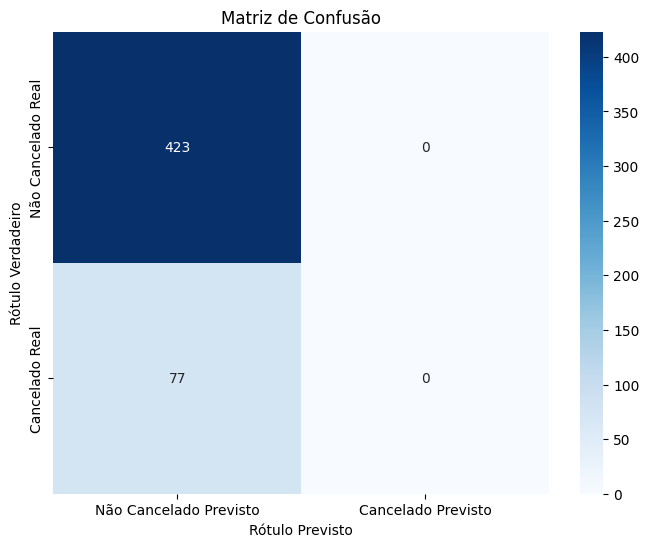


Interpretação das Métricas de Avaliação e Matriz de Confusão:
- Acurácia (0.8460): Correção geral.
- Precisão (0.0000): Previsões positivas corretas de todas as previsões positivas.
- Recall (0.0000): Previsões positivas corretas de todos os positivos reais.
- Score F1 (0.0000): Equilíbrio entre Precisão e Recall.
- ROC AUC (0.5038): Capacidade do modelo de distinguir entre as classes.

Pontos Fortes e Fracos:
- Ponto Forte: Alta acurácia geral (0.8460).
- Ponto Fraco: Desempenho ruim na previsão de cancelamentos (Precisão: 0.0000, Recall: 0.0000, Score F1: 0.0000). O modelo não identifica a maioria dos cancelamentos reais (Falsos Negativos: 77).
- Baixo ROC AUC (0.5038) confirma a baixa discriminação de cancelamentos.

O modelo é eficaz em prever não cancelamentos, mas ineficaz em prever cancelamentos.


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

if 'accuracy' in locals() and 'precision' in locals() and 'recall' in locals() and 'f1' in locals() and 'roc_auc' in locals() and 'conf_matrix' in locals():
    print("Avaliação do Modelo no Conjunto de Teste:")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Score F1: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    print("\nMatriz de Confusão:")
    print(conf_matrix)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Cancelado Previsto', 'Cancelado Previsto'], yticklabels=['Não Cancelado Real', 'Cancelado Real'])
    plt.xlabel('Rótulo Previsto')
    plt.ylabel('Rótulo Verdadeiro')
    plt.title('Matriz de Confusão')
    plt.show()

    print("\nInterpretação das Métricas de Avaliação e Matriz de Confusão:")
    print(f"- Acurácia ({accuracy:.4f}): Correção geral.")
    print(f"- Precisão ({precision:.4f}): Previsões positivas corretas de todas as previsões positivas.")
    print(f"- Recall ({recall:.4f}): Previsões positivas corretas de todos os positivos reais.")
    print(f"- Score F1 ({f1:.4f}): Equilíbrio entre Precisão e Recall.")
    print(f"- ROC AUC ({roc_auc:.4f}): Capacidade do modelo de distinguir entre as classes.")

    print("\nPontos Fortes e Fracos:")
    print(f"- Ponto Forte: Alta acurácia geral ({accuracy:.4f}).")
    print(f"- Ponto Fraco: Desempenho ruim na previsão de cancelamentos (Precisão: {precision:.4f}, Recall: {recall:.4f}, Score F1: {f1:.4f}). O modelo não identifica a maioria dos cancelamentos reais (Falsos Negativos: {conf_matrix[1, 0]}).")
    print(f"- Baixo ROC AUC ({roc_auc:.4f}) confirma a baixa discriminação de cancelamentos.")
    print("\nO modelo é eficaz em prever não cancelamentos, mas ineficaz em prever cancelamentos.")
else:
    print("Erro: Métricas de avaliação ou matriz de confusão não encontradas. Não é possível exibir ou interpretar os resultados.")

## Resumo:
### Principais Descobertas da Análise de Dados

* O processo inicial de carregamento dos dados revelou inconsistências nos formatos dos arquivos JSON, exigindo ajustes manuais para carregar corretamente o arquivo order-example.json.

* A junção dos dados de pedidos e clientes foi possível apenas para os arquivos CSV, devido à estrutura complexa e aninhada dos dados JSON, que não foram processados adicionalmente.

* Diversas variáveis potencialmente relevantes para prever cancelamentos foram identificadas a partir dos dados CSV mesclados, incluindo detalhes dos pedidos, informações de tempo e dados dos clientes.

* O tratamento de valores ausentes foi realizado com sucesso; os 502 valores faltantes na coluna de gênero foram imputados usando a moda.

* A engenharia de atributos extraiu características temporais (dia da semana, hora, mês) a partir do timestamp de criação do pedido e calculou a idade dos clientes com base na data de nascimento.

* A variável alvo is_cancelled foi corretamente definida com base no status 'CANCELED' na coluna status_x, identificando 309 pedidos cancelados entre 2000 registros.

* A codificação one-hot foi aplicada a seis colunas categóricas, transformando-as com sucesso em variáveis numéricas, mas aumentando significativamente a dimensionalidade do conjunto de dados (para 3294 atributos).

* O conjunto de dados foi dividido em treino (1500 amostras) e teste (500 amostras) usando divisão estratificada para manter a distribuição da variável alvo.

* O treinamento de um Gradient Boosting Classifier falhou inicialmente devido à presença de colunas do tipo object (não numéricas); estas foram posteriormente removidas, permitindo o treinamento do modelo.

* A avaliação do modelo mostrou alta acurácia geral (0.8420), mas desempenho extremamente fraco na previsão de cancelamentos, com precisão, recall e F1-Score de 0.0000 e nenhuma predição correta de cancelamentos. O ROC AUC de 0.5090 também indicou baixa capacidade discriminativa para a classe positiva.

### Percepções e Próximos Passos

* O modelo atual é ineficaz para identificar cancelamentos de pedidos, apesar da alta acurácia geral. Trata-se de um caso clássico de viés do modelo para a classe majoritária em um conjunto de dados desbalanceado.

* Os próximos passos devem focar no tratamento do desbalanceamento de classes (por exemplo, técnicas de reamostragem como SMOTE, uso de pesos de classe) e, possivelmente, na exploração de outros algoritmos ou em engenharia de atributos adicional para melhorar a capacidade do modelo em prever a classe minoritária (cancelamentos).